### Test Anomaly Modules Using Matrix Profile

- Both New York taxi data and steam generator data are used
- Demonstrate a couple of functions of matrix profile: 
  - normal: calculate matrix profile of each time series 
  - approx: compute an approximate matrix profile
  - incremental: compute incremental matrix profile for streaming time series data
  - kdp: identify the best K out of N time series that have detected anomalies at the same time slot using k-dimensional profile 

#### Anomaly types and matrix profile can convert different types fo anomalies into outliers
![Anomaly Types][anomaly_types]

[anomaly_types]: ./images/anomaly_types.png

#### Set up paths and load matrix profile module

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import warnings
warnings.filterwarnings("ignore")
# set up DACKAR path
cwd = os.getcwd()
frameworkDir = os.path.abspath(os.path.join(cwd, os.pardir, 'src'))
sys.path.append(frameworkDir)
# set up data path
data_path = os.path.abspath(os.path.join(cwd, os.pardir, 'data'))
# Load MatrixProfile module for anomaly detection
from dackar.anomalies.MatrixProfile import MatrixProfile

#### Calculate the matrix profiles for NY taxi data

- Anomalies occur during Columbus day, Daylight savings and Thanksgiving


![NY taxi data](./images/ny_taxi_data.png)

![NY taxi data matrix profile](./images/ny_taxi_mp.png)

Link: https://stumpy.readthedocs.io/en/latest/Tutorial_STUMPY_Basics.html 



- Load NY taxi data

In [2]:
# Load taxi data
taxi_data_file = os.path.abspath(os.path.join(data_path, 'nyc_taxi_passengers.csv'))
taxi_df = pd.read_csv(taxi_data_file, index_col='timestamp')
taxi_df['value'] = taxi_df['value'].astype(np.float64)
taxi_df.index = pd.to_datetime(taxi_df.index, errors='ignore')
taxi_df.head()

,value
timestamp,
2014-10-01 00:00:00,12751.0
2014-10-01 00:30:00,8767.0
2014-10-01 01:00:00,7005.0
2014-10-01 01:30:00,5257.0
2014-10-01 02:00:00,4189.0


- Compute the Matrix Profile for NY taxi data

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


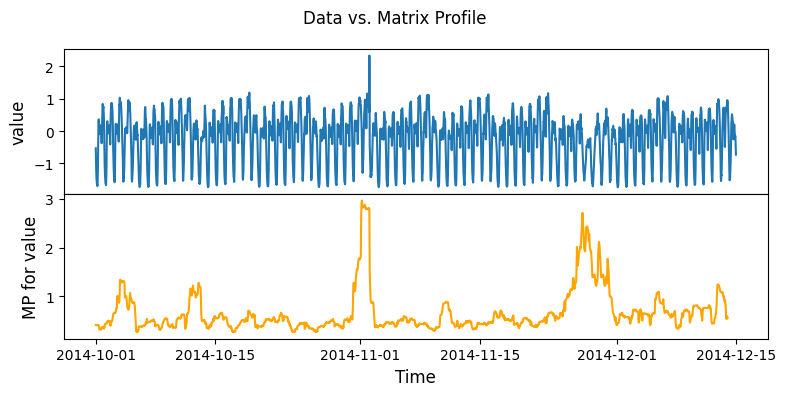

In [3]:
# set up sliding window side to 48 hours
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='normal')
mpObj.fit(taxi_df)
fig = mpObj.plot()

#### Calculate matrix profile for steam generator data

- Load data

In [4]:
steam_gen_data_file = os.path.abspath(os.path.join(data_path, 'Steamgen.csv'))
steam_df = pd.read_csv(steam_gen_data_file)
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


- Compute matrix profile for steam generator data

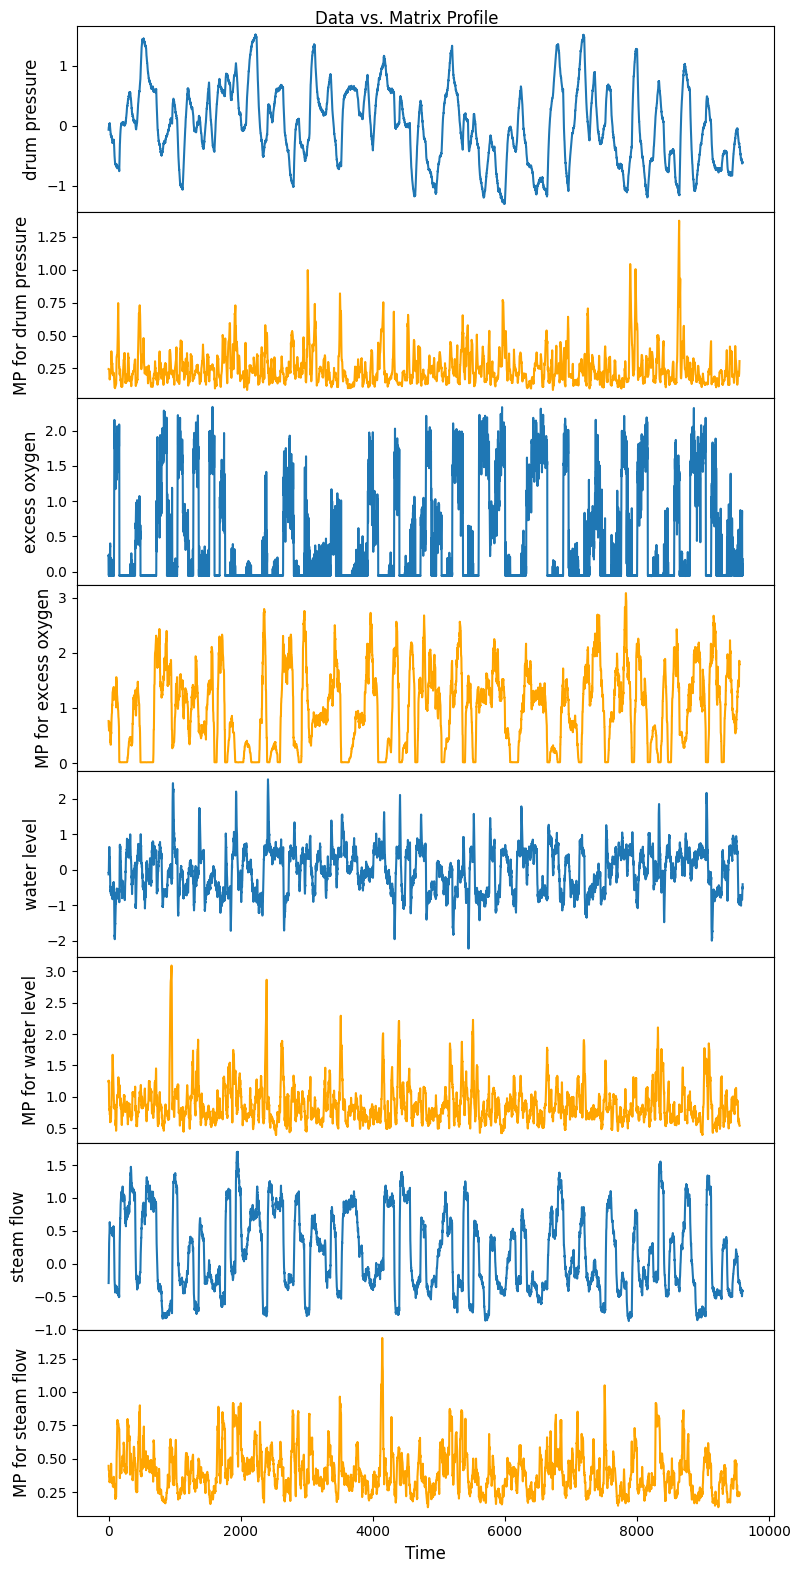

In [5]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='normal')
mpObj.fit(steam_df)
fig = mpObj.plot()

#### Testing 'approx' method to compute matrix profile

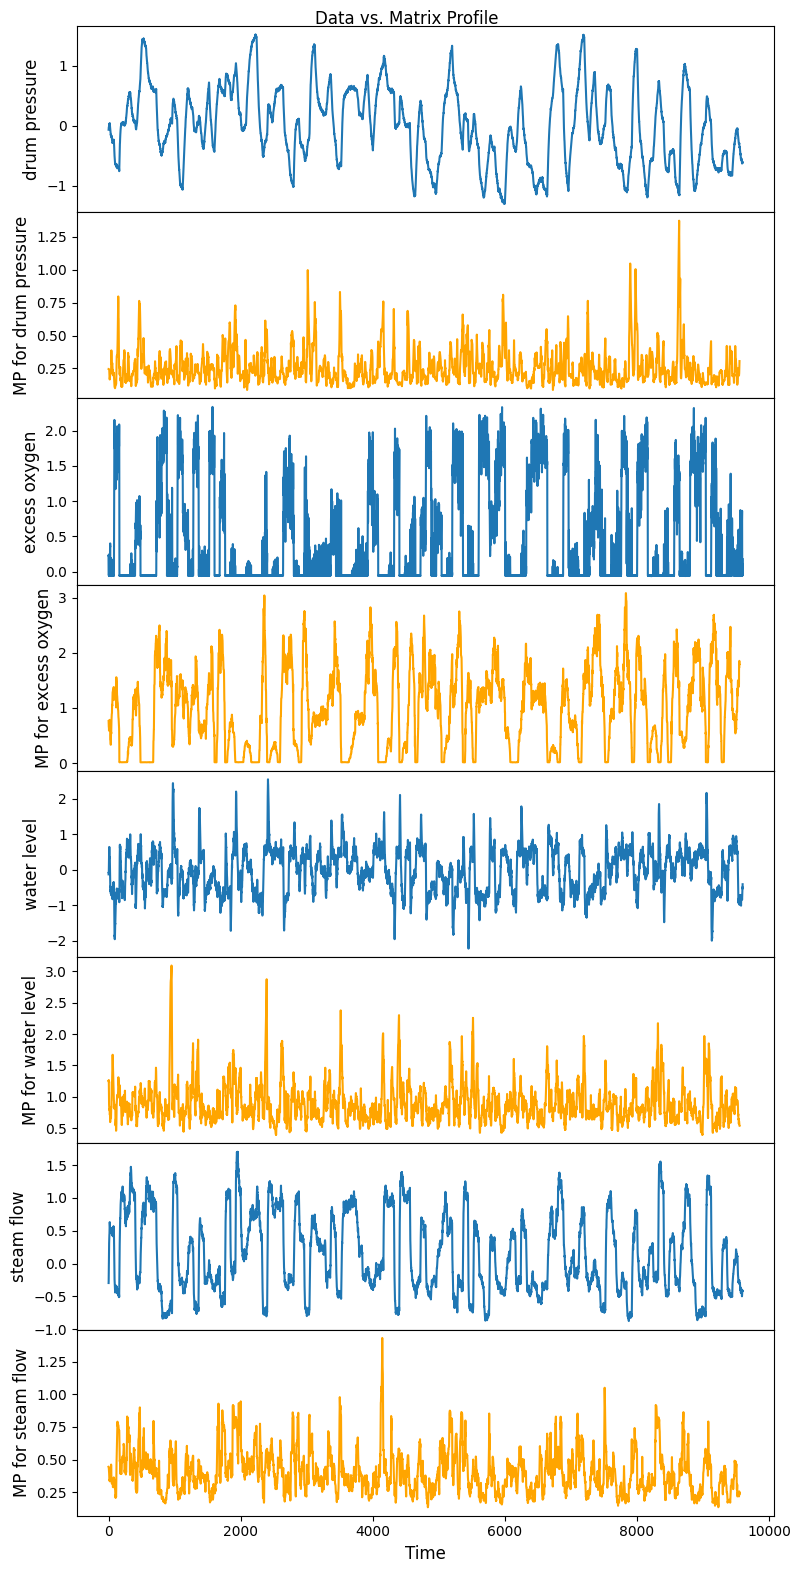

In [6]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='approx')
mpObj.fit(steam_df)
fig = mpObj.plot()

#### Enable Streaming, use 'evaluate' function for streaming data

- Compute matrix profile for first 1000 data points

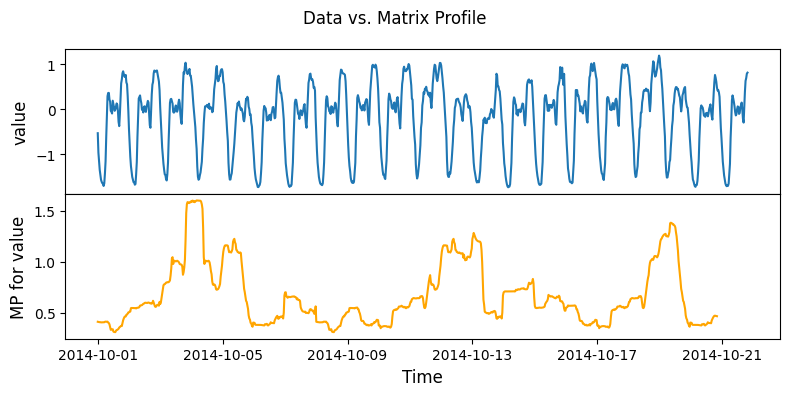

In [7]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='incremental')
mpObj.fit(taxi_df.iloc[0:1000])
fig = mpObj.plot()

- Evaluate more data points to demonstrate data streaming

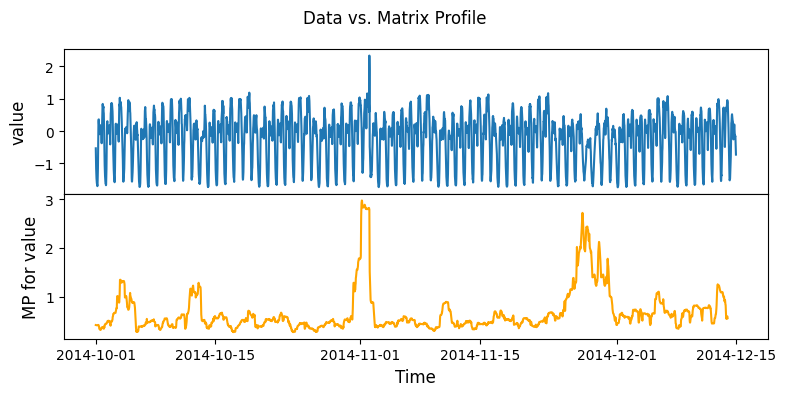

In [8]:
mpObj.evaluate(taxi_df.iloc[1000:])
fig = mpObj.plot()

#### Test different data structure

- Data structure: numpy.ndarray

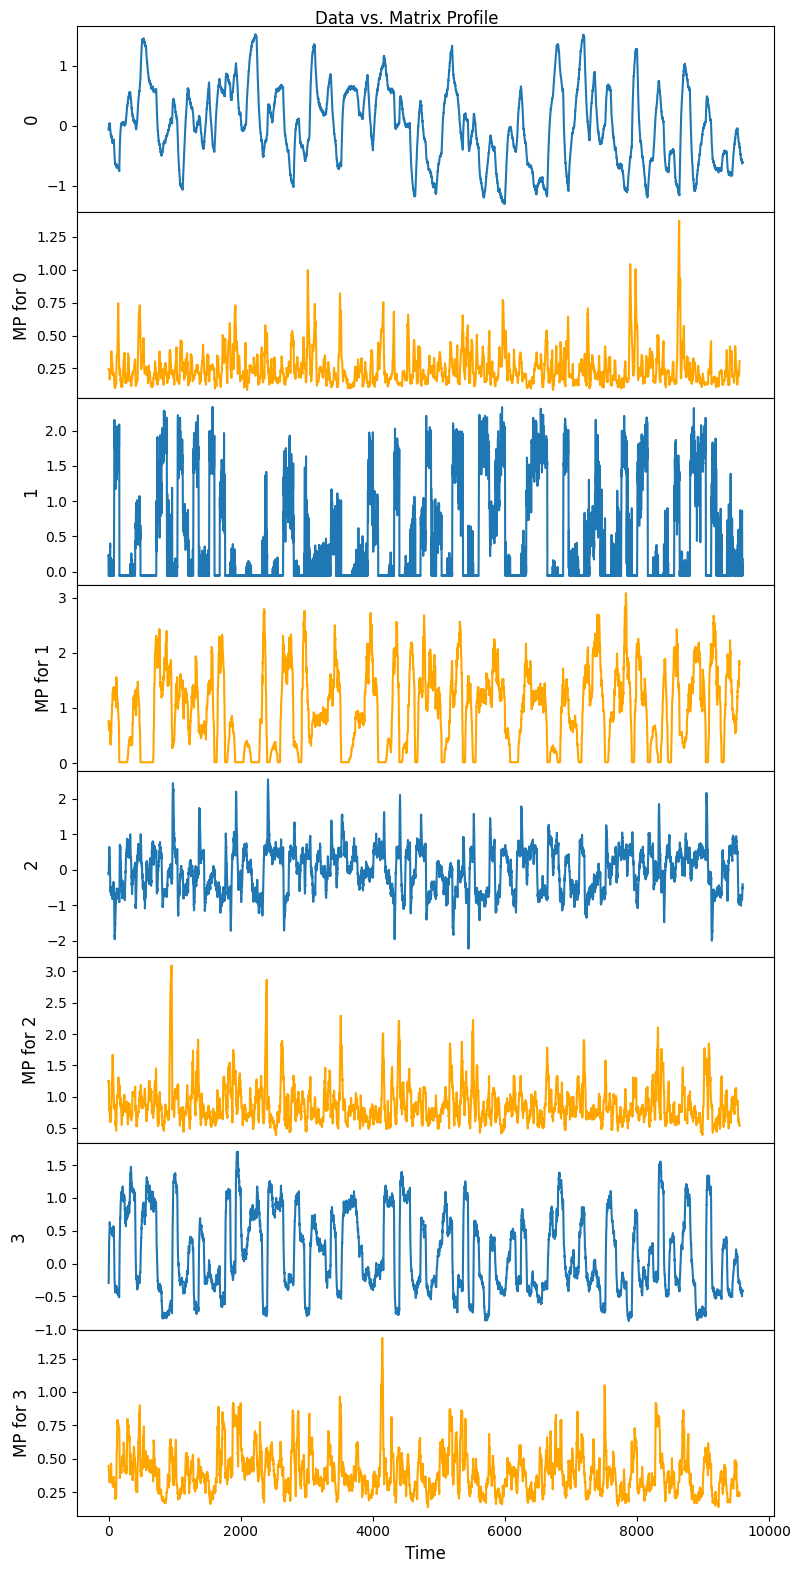

In [9]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='normal')
mpObj.fit(steam_df.to_numpy())
fig = mpObj.plot()


- Data structure: 1-D array data

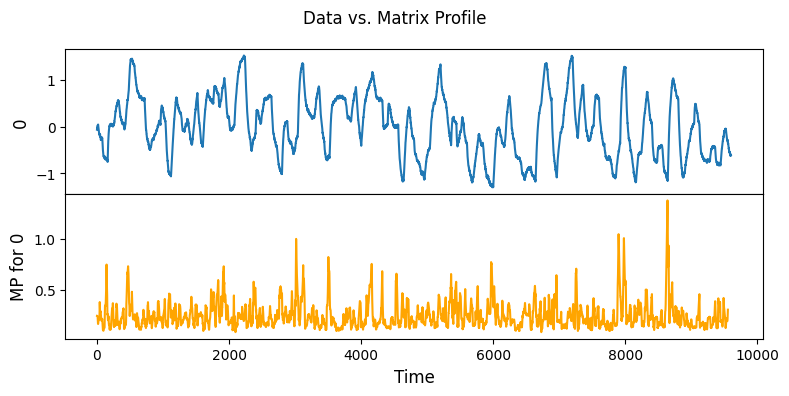

In [10]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='normal')
mpObj.fit(steam_df.to_numpy()[:,0])
fig = mpObj.plot()

- Data structure: pandas.Series data

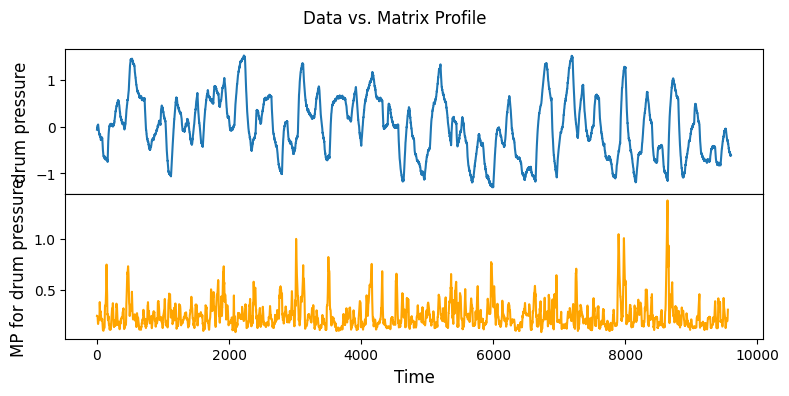

In [11]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='normal')
mpObj.fit(steam_df['drum pressure'])
fig = mpObj.plot()

#### Test Multi-Dimensional Anomaly Detection: Identify Best K out of N Anomalies

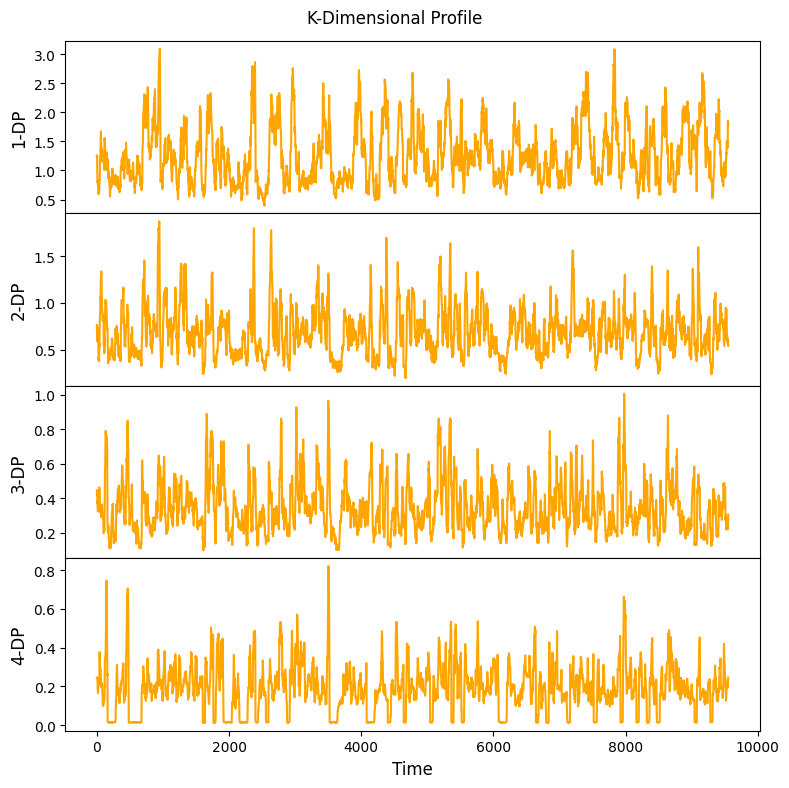

In [12]:
m = 48
mpObj = MatrixProfile(m, normalize='robust', method='normal', kdp=True)
mpObj.fit(steam_df)
fig = mpObj.plot_kdp()
